[Link to Presentation slides](https://www.canva.com/design/DAGXrn3w_S0/wecFp47ZN_bkXkLvRb7i0A/edit?utm_content=DAGXrn3w_S0&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

#Data Loading & Exploring the dataset before data prepocessing

**Objective**:  The project aimed to predict mental illness category from text data using the pre-trained model from hugging face.

The dataset contained 53k mental health records and has 3 columns including unnamed, statement and status. And we can see there are missing values in the statement column. There are seven categories of classification in "status" column.


In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/AhmedSSoliman/sentiment-analysis-for-mental-health-Combined-Data/sentiment-analysis-for-mental-health-Combined Data.csv")

In [ ]:
# Check the structure and summary
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53043 entries, 0 to 53042
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  53043 non-null  int64 
 1   statement   52681 non-null  object
 2   status      53043 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.2+ MB
None
         Unnamed: 0
count  53043.000000
mean   26521.000000
std    15312.339501
min        0.000000
25%    13260.500000
50%    26521.000000
75%    39781.500000
max    53042.000000


In [ ]:
#Checking how the data look like
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df['status'].value_counts()

,count
status,
Normal,16351
Depression,15404
Suicidal,10653
Anxiety,3888
Bipolar,2877
Stress,2669
Personality disorder,1201


In [ ]:
df.shape

(53043, 3)

#Data Preprocessing

In this step, the "Unnamed: 0" column is dropped as it is unncesssary for the further analysis. Missing values and duplicated data are checked and dropped 362 missing data and 1588 duplicated data. As a result, the new dataset contains

*   Columns: 2 (statement, status).
*   Rows: 51,093.
*   No Missing Values: All rows have valid statement and status entries.
*   No Duplicates: Every row is unique.

In [ ]:
#Dropping the unwanted column
data = df.drop(columns=["Unnamed: 0"])

In [ ]:
#Checking the missing data
data.isnull().sum()

,0
statement,362
status,0


In [ ]:
#Dropping the missing data
data = data.dropna()

In [ ]:
#Checking the duplicated data
data.duplicated().sum()

1588

In [ ]:
#Dropping the duplicated data
data.drop_duplicates(inplace=True)

In [ ]:
#Checking the Final Shape
data.shape

(51093, 2)

In [ ]:
#Resets the index of the DataFrame after dropping rows.
data = data.reset_index(drop=True)

## Data Cleaning
In this step, I created a smaller dataset for exploratory analysis or testing by randomly selecting a fraction of the rows from the dataset. Only 25% of the data will be sampled.

*   Input DataFrame Shape: (51,093, 2)
*   Sampled DataFrame Shape: (12,773, 2)

In the next step, I cleaned the statement column as it is the text data by removing special characters, numbers and stop words, lemmatize the text, and stemming the text and copied the preprocessed data into a new dataframe.

In [ ]:
import nltk
from nltk.corpus import stopwords
from tqdm import tqdm
from nltk.stem import PorterStemmer
import spacy

# Download stop words list (if not already downloaded)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load SpaCy's language model (for lemmatization)
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
sample_df= data.sample(frac=1/4, random_state = 42).reset_index(drop=True)

In [ ]:
import re
def remove_stop_words(text):
    # Tokenize the text and filter out stop words
    words = [word for word in text.split() if word.lower() not in stop_words]
    return ' '.join(words)
def lemmatize_text(text):
    doc = nlp(text)  # Process text with SpaCy
    lemmatized_text = ' '.join([token.lemma_ for token in doc if not token.is_punct])  # Skip punctuation
    return lemmatized_text
def stem_word(text):  # Stemming
    stemmer = nltk.stem.PorterStemmer()
    words = [stemmer.stem(word) for word in text.split()]
    return ' '.join(words)
def clean_text(text):
    """Clean text by removing URLs, special characters, and numbers."""
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)  # Remove URLs
    text = re.sub(r'\@\w+|\#', '', text)  # Remove mentions and hashtags
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # Remove special characters and numbers
    return text.lower().strip()  # Convert to lowercase and strip whitespace

def preprocess_text(text):
    """Apply all preprocessing steps to the text."""
    text = clean_text(text)            # Step 1: Clean the text
    text = remove_stop_words(text)     # Step 2: Remove stop words
    text = lemmatize_text(text)        # Step 3: Lemmatize text
    text = stem_word(text)             # Step 4: Apply stemming
    return text

# Apply preprocessing to the DataFrame
df = sample_df.copy()
for i, sentence in enumerate(tqdm(sample_df["statement"], desc="Processing Text")):
    df.loc[i, "statement"] = preprocess_text(sentence)

Processing Text: 100%|██████████| 12773/12773 [03:03<00:00, 69.63it/s]


## Explanatory Data Analysis

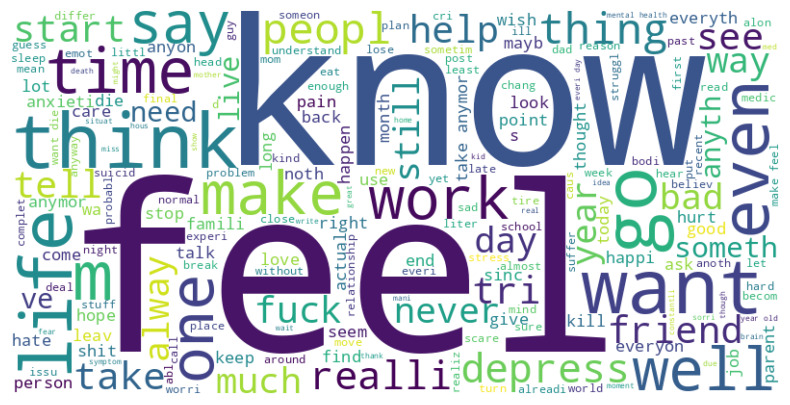

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Generate a word cloud
text = " ".join(review for review in df.statement)
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

<ipython-input-23-2e0081c2c5c1>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=df, palette='viridis')


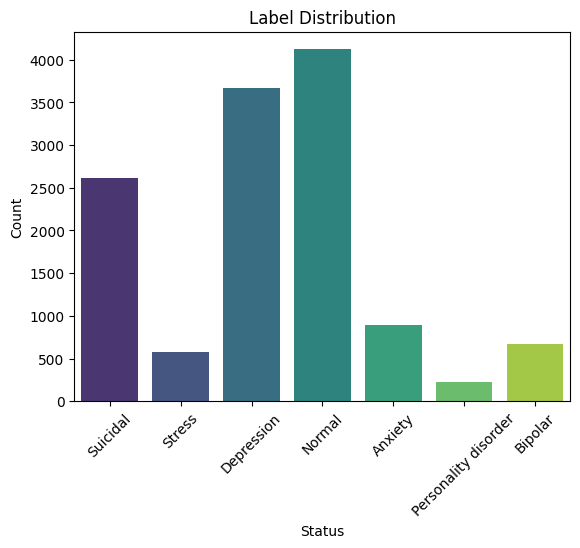

In [ ]:
# Plot label distribution
sns.countplot(x='status', data=df, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel("Status")
plt.ylabel("Count" )
plt.title("Label Distribution")
plt.show()


#Loading the model
There is not enough RAM for loading the model so I have to switch the runtime type to GPU.

In [ ]:
from transformers import AutoTokenizer,AutoModelForCausalLM,pipeline
import torch


GPU is available: Tesla T4


In [ ]:
# Check GPU availability
import torch
import tensorflow as tf
import spacy
from transformers import AutoModel, AutoTokenizer

if torch.cuda.is_available():
    print(f"PyTorch GPU: {torch.cuda.get_device_name(0)}")
else:
    print("PyTorch GPU not available.")

print(f"TensorFlow GPUs: {len(tf.config.list_physical_devices('GPU'))}")
spacy.prefer_gpu()
print("SpaCy is using GPU:", spacy.require_gpu())

# PyTorch Example
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
tensor = torch.randn(3, 3).to(device)
print("PyTorch Tensor:", tensor)

# TensorFlow Example
with tf.device('/GPU:0'):
    result = tf.matmul(tf.constant([[1.0, 2.0]]), tf.constant([[3.0], [4.0]]))
print("TensorFlow Result:", result)

# Hugging Face Example
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased").to(device)
inputs = tokenizer("Hello, GPU!", return_tensors="pt").to(device)
outputs = model(**inputs)
print("Hugging Face Output:", outputs.last_hidden_state.shape)

# SpaCy Example
nlp = spacy.load("en_core_web_sm")
doc = nlp("GPU-powered text processing!")
print("SpaCy Tokens:", [token.text for token in doc])


PyTorch GPU: Tesla T4
TensorFlow GPUs: 1
SpaCy is using GPU: True
PyTorch Tensor: tensor([[-1.3681, -0.7114,  0.6280],
        [-0.7865,  2.0975, -1.6050],
        [-1.6355,  0.5405, -1.4189]], device='cuda:0')
TensorFlow Result: tf.Tensor([[11.]], shape=(1, 1), dtype=float32)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Hugging Face Output: torch.Size([1, 7, 768])
SpaCy Tokens: ['GPU', '-', 'powered', 'text', 'processing', '!']


In [ ]:
# Downloading model
model_id = "kingabzpro/Llama-3.1-8B-Instruct-Mental-Health-Classification"

tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
        model_id,
        return_dict=True,
        low_cpu_mem_usage=True,
        torch_dtype=torch.float16,
        device_map="auto",
        trust_remote_code=True,
)

tokenizer_config.json:   0%|          | 0.00/50.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

#Test model output

Testing the output of the model with a sample text and the result is Depression.

In [ ]:
# Downloading model
model_id = "kingabzpro/Llama-3.1-8B-Instruct-Mental-Health-Classification"

tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(
    model_id,
    return_dict=True,
    low_cpu_mem_usage=True,
    torch_dtype=torch.float16,
    device_map="auto",
    trust_remote_code=True,
)


text = "I can't sleep at night. I think about my past decisions and blame myself for it."
prompt = f"""Classify the text into Normal, Depression, Suicidal, Anxiety, Bipolar, Stress, Personality disorder and return the answer as the corresponding mental health disorder label.
text: {text}
label: """.strip()

# Update: Using 'generate' directly instead of pipeline
# We call 'generate' method directly instead of using pipeline
# with 'text-generation' task which appears to be causing issues with 'prefix'.
input_ids = tokenizer(prompt, return_tensors="pt").input_ids.to(model.device)
outputs = model.generate(input_ids, max_new_tokens=2, do_sample=True, temperature=0.1)
generated_text = tokenizer.decode(outputs[0], skip_special_tokens=True)

print(generated_text)


tokenizer_config.json:   0%|          | 0.00/50.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/23.9k [00:00<?, ?B/s]

model-00001-of-00004.safetensors:   0%|          | 0.00/4.98G [00:00<?, ?B/s]

model-00002-of-00004.safetensors:   0%|          | 0.00/5.00G [00:00<?, ?B/s]

model-00003-of-00004.safetensors:   0%|          | 0.00/4.92G [00:00<?, ?B/s]

model-00004-of-00004.safetensors:   0%|          | 0.00/1.17G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/184 [00:00<?, ?B/s]

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Classify the text into Normal, Depression, Suicidal, Anxiety, Bipolar, Stress, Personality disorder and return the answer as the corresponding mental health disorder label.
text: I can't sleep at night. I think about my past decisions and blame myself for it.
label: Depression



#Model Evaluation

I only take the first 100 rows to test the model because apparently the runtime can't handle a large dataset.

In [ ]:
# Function to get the prediction
def get_label(text):
    prompt = f"""Classify the text into Normal, Depression, Suicidal, Anxiety, Bipolar, Stress, Personality disorder and return the answer as the corresponding mental health disorder label.
        text: {text}
        label: """.strip()
    # pipeline for the LLM
    pipe = pipeline(
    "text-generation",
    model=model,
    tokenizer=tokenizer,
    torch_dtype=torch.float16,
    device_map="auto",
    )

    outputs = pipe(prompt, max_new_tokens=2, do_sample=True, temperature=0.1)
    return outputs[0]['generated_text'].split("label: ")[-1].strip()

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
y_pred = df["statement"][:100].apply(get_label) # Only predict the first 100 values

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Setting `pad_token_id` to `eos_token_id`:None for open-end generation.
Settin

In [ ]:
# Replace incorrect predictions
y_pred = ["Suicidal" if label == "Suic" else label for label in y_pred]


In [ ]:
# Accuracy check
print("Accuracy score:", accuracy_score(sample_df["status"][:100], y_pred))
print("Classification report: \n", classification_report(sample_df["status"][:100], y_pred))

Accuracy score: 0.69
Classification report: 
                       precision    recall  f1-score   support

             Anxiety       0.67      0.67      0.67         6
             Bipolar       0.67      0.67      0.67         3
          Depression       0.54      0.90      0.67        31
              Normal       0.89      1.00      0.94        33
Personality disorder       0.00      0.00      0.00         1
              Stress       1.00      0.12      0.22         8
            Suicidal       1.00      0.06      0.11        18

            accuracy                           0.69       100
           macro avg       0.68      0.49      0.47       100
        weighted avg       0.78      0.69      0.62       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


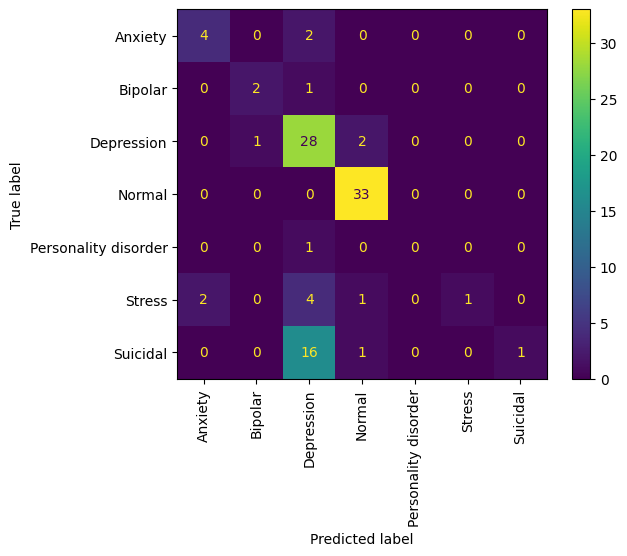

In [ ]:
ConfusionMatrixDisplay.from_predictions(sample_df["status"][:100], y_pred, xticks_rotation='vertical')

# Interpretation of the Output
The classification model was evaluated on a random 25% sample of the data, resulting in an accuracy of 69%. The model performed well for some classes, particularly Normal and Depression, but struggled with others, especially for Personality Disorder, Stress, and Suicidal. This indicates that the model is sensitive to the distribution of classes, with stronger performance on majority classes and weaker results for minority ones. The classification report reveals imbalanced precision and recall values across different classes, highlighting areas that need improvement for better predictive performance.

###Key Observations:

**High Accuracy for Certain Classes:**
Normal and Depression had strong performance metrics, with Normal achieving perfect recall (1.00) and high precision (0.89).
Depression had a relatively high recall (0.90) but lower precision (0.54), suggesting many false positives.

**Performance Issues with Minority Classes:**
Personality Disorder showed 0.00 precision and recall, indicating that the model completely failed to identify this class.
Stress and Suicidal had high precision (1.00), but very low recall, meaning the model missed most true instances of these conditions.

**Class Imbalance:**
The dataset contains a large class imbalance, where Normal and Depression are overrepresented compared to minority classes such as Personality Disorder and Stress. This imbalance leads to better model performance on the majority classes and worse performance on the minority ones.

**Low F1-scores for Some Classes:**
The F1-score for several classes, including Stress and Suicidal, was low, indicating that the model's balance between precision and recall is poor for these classes.

**Macro vs. Weighted Averages:**
Macro average (average across all classes) shows low recall (0.49) and F1-score (0.47), indicating poor overall performance across all classes, particularly those with fewer samples.
Weighted average (which considers class frequency) is higher, indicating that the model performs better when focusing on more frequent classes.

**Normal is Predicted Well:**
"Normal" cases are predicted with high accuracy (33 correct predictions).
Few misclassifications occur for this label.

**Depression Shows Good Results:**
Out of 31 true instances of "Depression," 28 are classified correctly.
1 case is misclassified as "Bipolar," and 2 as "Normal."

**Misclassification in "Suicidal" Cases:**
Of the true "Suicidal" cases, 16 are misclassified as "Depression."
Only 1 instance of "Suicidal" is correctly identified.

**Stress and Personality Disorder:**
"Stress" and "Personality Disorder" have several misclassifications.
For example, "Stress" cases are distributed across various other labels.

**Rare Categories:**
"Anxiety," "Bipolar," and "Suicidal" show relatively low correct predictions and high misclassifications.
Smaller sample sizes in these categories might be contributing to the lower accuracy.

###Conclusion:

While the model shows reasonable accuracy (69%), its performance is heavily skewed by class imbalances, leading to strong results for some classes and weak results for others. The model needs improvements, particularly for minority classes, which can be addressed through techniques like oversampling, class weighting, and further model refinement.
